# Assignment 3.1: Feature Store

## 0. Install Dependencies (Run this cell first if packages are not installed)

In [1]:
# Install required packages
!pip install -q pandas numpy matplotlib seaborn jupyter

# Verify installations
import sys
print(f"Python version: {sys.version}")
print("\nVerifying package installations...")

required_packages = ['pandas', 'numpy', 'matplotlib', 'seaborn']

for package in required_packages:
    try:
        module = __import__(package)
        version = getattr(module, '__version__', 'version unknown')
        print(f"{package} {version}")
    except ImportError:
        print(f"{package} is NOT installed")

print("\nReady to proceed!")

Python version: 3.12.9 | packaged by conda-forge | (main, Feb 14 2025, 08:00:06) [GCC 13.3.0]

Verifying package installations...
pandas 2.3.3
numpy 1.26.4
matplotlib 3.10.8
seaborn 0.13.2

Ready to proceed!


## 1. Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Datasets
### a. Housing Data
### b. Google Maps data

In [3]:
housing_df = pd.read_csv('housing.csv')
print("Housing Dataset Shape:", housing_df.shape)
print("\nFirst few rows of housing data:")
display(housing_df.head())

print("\n" + "="*80)
print("Housing Dataset Info:")
housing_df.info()

Housing Dataset Shape: (20640, 10)

First few rows of housing data:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY



Housing Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
gmaps_df = pd.read_csv('housing_gmaps_data_raw.csv')
print("Google Maps Dataset Shape:", gmaps_df.shape)
print("\nFirst few rows of Google Maps data:")
display(gmaps_df.head())

print("\n" + "="*80)
print("Google Maps Dataset Info:")
gmaps_df.info()

Google Maps Dataset Shape: (12590, 30)

First few rows of Google Maps data:


,street_number,route,locality-political,administrative_area_level_2-political,administrative_area_level_1-political,country-political,postal_code,address,longitude,latitude,neighborhood-political,postal_code_suffix,establishment-point_of_interest-transit_station,establishment-park-point_of_interest,premise,establishment-point_of_interest-subway_station-transit_station,airport-establishment-finance-moving_company-point_of_interest-storage,subpremise,bus_station-establishment-point_of_interest-transit_station,establishment-park-point_of_interest-tourist_attraction,establishment-natural_feature,airport-establishment-point_of_interest,political-sublocality-sublocality_level_1,administrative_area_level_3-political,post_box,establishment-light_rail_station-point_of_interest-transit_station,establishment-point_of_interest,aquarium-establishment-park-point_of_interest-tourist_attraction-zoo,campground-establishment-lodging-park-point_of_interest-rv_park-tourist_attraction,cemetery-establishment-park-point_of_interest
0,3130,Grizzly Peak Boulevard,Berkeley,Alameda County,California,United States,94705.0,"3130 Grizzly Peak Blvd, Berkeley, CA 94705, USA",-122.23,37.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005,Tunnel Road,Oakland,Alameda County,California,United States,94611.0,"2005 Tunnel Rd, Oakland, CA 94611, USA",-122.22,37.86,Merriewood,1021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6886,Chabot Road,Oakland,Alameda County,California,United States,94618.0,"6886 Chabot Rd, Oakland, CA 94618, USA",-122.24,37.85,Upper Rockridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6365,Florio Street,Oakland,Alameda County,California,United States,94618.0,"6365 Florio St, Oakland, CA 94618, USA",-122.25,37.85,Rockridge,1335.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5407,Bryant Avenue,Oakland,Alameda County,California,United States,94618.0,"5407 Bryant Ave, Oakland, CA 94618, USA",-122.25,37.84,Rockridge,1431.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Google Maps Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12590 entries, 0 to 12589
Data columns (total 30 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   street_number                                                                       11188 non-null  object 
 1   route                                                                               12210 non-null  object 
 2   locality-political                                                                  12403 non-null  object 
 3   administrative_area_level_2-political                                               12543 non-null  object 
 4   administrative_area_level_1-political                                               12587 non-null  object 
 5   country-political                                                   

## 3. Data Cleaning

In [5]:
print("Unique values in ocean_proximity:")
print(housing_df['ocean_proximity'].value_counts())

print("\n" + "="*80)
print("Missing values in housing data:")
print(housing_df.isnull().sum())

print("\n" + "="*80)
print("Summary Statistics:")
display(housing_df.describe())

Unique values in ocean_proximity:
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Missing values in housing data:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Summary Statistics:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
print("Neighborhoods available (first 20):")
neighborhoods = gmaps_df['neighborhood-political'].dropna().unique()
print(f"Total unique neighborhoods: {len(neighborhoods)}")
print("\nSample neighborhoods:")
print(neighborhoods[:20])

target_neighborhoods = ['Brooktree', "Fisherman's Wharf", 'Los Osos']
print("\n" + "="*80)
print("Checking for target neighborhoods:")
for neighborhood in target_neighborhoods:
    count = gmaps_df[gmaps_df['neighborhood-political'] == neighborhood].shape[0]
    print(f"{neighborhood}: {count} records found")

Neighborhoods available (first 20):
Total unique neighborhoods: 1306

Sample neighborhoods:
['Merriewood' 'Upper Rockridge' 'Rockridge' 'Shafter' 'Upper Telegraph'
 'Southwest Berkeley' 'Gaskill' 'Longfellow' 'Temescal' 'Hoover - Foster'
 'Oakland Ave - Harrison St' 'McClymonds' 'Prescott' 'Oak Center'
 'Acorn Industrial' 'Produce and Waterfront' 'Downtown Oakland'
 'Cleveland Heights' 'Trestle Glen' 'Grand Lake']

Checking for target neighborhoods:
Brooktree: 1 records found
Fisherman's Wharf: 1 records found
Los Osos: 7 records found


## 4. Merge Datasets

Merge housing data with Google Maps data based on longitude and latitude coordinates.

In [7]:
housing_df['longitude_rounded'] = housing_df['longitude'].round(2)
housing_df['latitude_rounded'] = housing_df['latitude'].round(2)

gmaps_df['longitude_rounded'] = gmaps_df['longitude'].round(2)
gmaps_df['latitude_rounded'] = gmaps_df['latitude'].round(2)

merged_df = pd.merge(
    housing_df,
    gmaps_df[['longitude_rounded', 'latitude_rounded', 'neighborhood-political', 'postal_code']],
    on=['longitude_rounded', 'latitude_rounded'],
    how='left'
)

print(f"Merged dataset shape: {merged_df.shape}")
print(f"\nRecords with neighborhood data: {merged_df['neighborhood-political'].notna().sum()}")
print(f"Records without neighborhood data: {merged_df['neighborhood-political'].isna().sum()}")

display(merged_df.head(10))

Merged dataset shape: (20640, 14)

Records with neighborhood data: 9000
Records without neighborhood data: 11640


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,longitude_rounded,latitude_rounded,neighborhood-political,postal_code
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122.23,37.88,NaN,94705.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122.22,37.86,Merriewood,94611.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122.24,37.85,Upper Rockridge,94618.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122.25,37.85,Rockridge,94618.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122.25,37.85,Rockridge,94618.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,-122.25,37.85,Rockridge,94618.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,-122.25,37.84,Rockridge,94618.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,-122.25,37.84,Rockridge,94618.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122.26,37.84,Shafter,94618.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,-122.25,37.84,Rockridge,94618.0


## 5. Feature Engineering

### 5.1 Create One-Hot Encoded Features from ocean_proximity

In [8]:
merged_df['<1h_ocean'] = (merged_df['ocean_proximity'] == '<1H OCEAN').astype(int)
merged_df['inland'] = (merged_df['ocean_proximity'] == 'INLAND').astype(int)
merged_df['island'] = (merged_df['ocean_proximity'] == 'ISLAND').astype(int)
merged_df['near_bay'] = (merged_df['ocean_proximity'] == 'NEAR BAY').astype(int)
merged_df['near_ocean'] = (merged_df['ocean_proximity'] == 'NEAR OCEAN').astype(int)

print("One-hot encoded columns created successfully!")
print("\nVerification of one-hot encoding:")
print(merged_df[['ocean_proximity', '<1h_ocean', 'inland', 'island', 'near_bay', 'near_ocean']].head(10))

One-hot encoded columns created successfully!

Verification of one-hot encoding:
  ocean_proximity  <1h_ocean  inland  island  near_bay  near_ocean
0        NEAR BAY          0       0       0         1           0
1        NEAR BAY          0       0       0         1           0
2        NEAR BAY          0       0       0         1           0
3        NEAR BAY          0       0       0         1           0
4        NEAR BAY          0       0       0         1           0
5        NEAR BAY          0       0       0         1           0
6        NEAR BAY          0       0       0         1           0
7        NEAR BAY          0       0       0         1           0
8        NEAR BAY          0       0       0         1           0
9        NEAR BAY          0       0       0         1           0


### 5.2 Calculate Bedrooms Per Household

Impute missing values using the average for each postal code.

In [9]:
merged_df['bedrooms_per_household'] = merged_df['total_bedrooms'] / merged_df['households']

print(f"Missing values in total_bedrooms before imputation: {merged_df['total_bedrooms'].isna().sum()}")
print(f"Missing values in bedrooms_per_household before imputation: {merged_df['bedrooms_per_household'].isna().sum()}")

postal_code_avg = merged_df.groupby('postal_code')['bedrooms_per_household'].transform('mean')

global_avg = merged_df['bedrooms_per_household'].mean()

merged_df['bedrooms_per_household'] = merged_df['bedrooms_per_household'].fillna(postal_code_avg).fillna(global_avg)

print(f"\nMissing values in bedrooms_per_household after imputation: {merged_df['bedrooms_per_household'].isna().sum()}")
print(f"\nBedrooms per household statistics:")
print(merged_df['bedrooms_per_household'].describe())

Missing values in total_bedrooms before imputation: 207
Missing values in bedrooms_per_household before imputation: 207

Missing values in bedrooms_per_household after imputation: 0

Bedrooms per household statistics:
count    20640.000000
mean         1.096791
std          0.473887
min          0.333333
25%          1.006508
50%          1.048860
75%          1.099186
max         34.066667
Name: bedrooms_per_household, dtype: float64


### 5.3 Discretize Housing Age into 10-Year Buckets

In [10]:
def discretize_age(age):
    if pd.isna(age):
        return np.nan
    bucket = int(age // 10) * 10
    return f"{bucket}-{bucket + 9}"

merged_df['housing_age_bucket'] = merged_df['housing_median_age'].apply(discretize_age)

print("Housing age discretization completed!")
print("\nAge bucket distribution:")
print(merged_df['housing_age_bucket'].value_counts().sort_index())

Housing age discretization completed!

Age bucket distribution:
housing_age_bucket
0-9      1305
10-19    4523
20-29    4841
30-39    5789
40-49    2725
50-59    1457
Name: count, dtype: int64


## 6. Create Neighborhood Feature Group

Aggregate data by neighborhood to create the feature group with:
- primary_key: neighborhood
- event_time: ingestion timestamp
- One-hot encoded ocean proximity features (averaged)
- median_house_value: averaged and capped at 500,000
- median_house_age: averaged and discretized
- total_households: averaged and rounded up
- bedrooms_per_household: averaged

In [11]:
neighborhood_data = merged_df[merged_df['neighborhood-political'].notna()].copy()

print(f"Records with neighborhood data: {len(neighborhood_data)}")
print(f"Unique neighborhoods: {neighborhood_data['neighborhood-political'].nunique()}")

Records with neighborhood data: 9000
Unique neighborhoods: 1306


In [12]:
neighborhood_features = neighborhood_data.groupby('neighborhood-political').agg({
    '<1h_ocean': 'mean',
    'inland': 'mean',
    'island': 'mean',
    'near_bay': 'mean',
    'near_ocean': 'mean',
    'median_house_value': 'mean',
    'housing_median_age': 'mean',
    'households': 'mean',
    'bedrooms_per_household': 'mean'
}).reset_index()

neighborhood_features.rename(columns={
    'neighborhood-political': 'neighborhood',
    'housing_median_age': 'median_house_age',
    'households': 'total_households'
}, inplace=True)

neighborhood_features['median_house_value'] = neighborhood_features['median_house_value'].clip(upper=500000)

neighborhood_features['total_households'] = np.ceil(neighborhood_features['total_households']).astype(int)

neighborhood_features['median_house_age_bucket'] = neighborhood_features['median_house_age'].apply(discretize_age)

neighborhood_features['event_time'] = datetime.now().isoformat()

neighborhood_features['primary_key'] = neighborhood_features['neighborhood']

print("Neighborhood Feature Group created successfully!")
print(f"\nTotal neighborhoods in feature group: {len(neighborhood_features)}")
print(f"\nFeature columns: {list(neighborhood_features.columns)}")

Neighborhood Feature Group created successfully!

Total neighborhoods in feature group: 1306

Feature columns: ['neighborhood', '<1h_ocean', 'inland', 'island', 'near_bay', 'near_ocean', 'median_house_value', 'median_house_age', 'total_households', 'bedrooms_per_household', 'median_house_age_bucket', 'event_time', 'primary_key']


In [13]:
feature_store_columns = [
    'primary_key',
    'neighborhood',
    'event_time',
    '<1h_ocean',
    'inland',
    'island',
    'near_bay',
    'near_ocean',
    'median_house_value',
    'median_house_age',
    'median_house_age_bucket',
    'total_households',
    'bedrooms_per_household'
]

neighborhood_feature_store = neighborhood_features[feature_store_columns].copy()

print("Final Neighborhood Feature Store:")
print(f"Shape: {neighborhood_feature_store.shape}")
display(neighborhood_feature_store.head(10))

Final Neighborhood Feature Store:
Shape: (1306, 13)


,primary_key,neighborhood,event_time,<1h_ocean,inland,island,near_bay,near_ocean,median_house_value,median_house_age,median_house_age_bucket,total_households,bedrooms_per_household
0,28 Palms,28 Palms,2026-01-23T17:05:16.756655,1.0,0.0,0.0,0.0,0.0,222200.000000,25.000000,20-29,923,1.017335
1,Acorn Industrial,Acorn Industrial,2026-01-23T17:05:16.756655,0.0,0.0,0.0,1.0,0.0,81300.000000,52.000000,50-59,147,1.659864
2,Adams Hill,Adams Hill,2026-01-23T17:05:16.756655,1.0,0.0,0.0,0.0,0.0,250733.333333,39.500000,30-39,494,1.034649
3,Agua Mansa Industrial Corridor,Agua Mansa Industrial Corridor,2026-01-23T17:05:16.756655,0.0,1.0,0.0,0.0,0.0,112300.000000,17.000000,10-19,516,1.102713
4,Al Tahoe,Al Tahoe,2026-01-23T17:05:16.756655,0.0,1.0,0.0,0.0,0.0,109180.000000,23.800000,20-29,249,1.641739
5,Alamitos Beach,Alamitos Beach,2026-01-23T17:05:16.756655,0.0,0.0,0.0,0.0,1.0,188194.117647,36.941176,30-39,664,1.117409
6,Alessandro,Alessandro,2026-01-23T17:05:16.756655,0.0,1.0,0.0,0.0,0.0,68075.000000,38.750000,30-39,409,1.055551
7,Alessandro Heights,Alessandro Heights,2026-01-23T17:05:16.756655,0.0,1.0,0.0,0.0,0.0,315200.000000,7.000000,0-9,1107,1.066847
8,Alhambra Triangle,Alhambra Triangle,2026-01-23T17:05:16.756655,0.0,1.0,0.0,0.0,0.0,88850.000000,49.750000,40-49,382,1.114779
9,Alice,Alice,2026-01-23T17:05:16.756655,0.0,0.0,0.0,1.0,0.0,404300.000000,36.000000,30-39,483,1.020704


## 7. Query Feature Values for Specific Neighborhoods

Query the feature store for the three required neighborhoods:
1. Brooktree
2. Fisherman's Wharf
3. Los Osos

In [14]:
def query_neighborhood_features(neighborhood_name):
    """
    Query features for a specific neighborhood from the feature store.
    """
    result = neighborhood_feature_store[neighborhood_feature_store['neighborhood'] == neighborhood_name]
    
    if len(result) == 0:
        print(f"\n{'='*80}")
        print(f"Neighborhood: {neighborhood_name}")
        print("="*80)
        print(f"No data found for '{neighborhood_name}' in the feature store.")
        print("\nSearching for similar neighborhood names...")
        
        similar = neighborhood_feature_store[
            neighborhood_feature_store['neighborhood'].str.contains(neighborhood_name, case=False, na=False)
        ]
        
        if len(similar) > 0:
            print(f"\nFound {len(similar)} similar neighborhood(s):")
            for idx, row in similar.iterrows():
                print(f"  - {row['neighborhood']}")
        else:
            print("No similar neighborhoods found.")
    else:
        print(f"\n{'='*80}")
        print(f"QUERY RESULT: {neighborhood_name}")
        print("="*80)
        display(result.T) 
        
    return result

print("Feature Store Query Function created successfully!")

Feature Store Query Function created successfully!


### 7.1 Query: Brooktree

In [15]:
brooktree_features = query_neighborhood_features('Brooktree')


QUERY RESULT: Brooktree


,130
primary_key,Brooktree
neighborhood,Brooktree
event_time,2026-01-23T17:05:16.756655
<1h_ocean,1.0
inland,0.0
island,0.0
near_bay,0.0
near_ocean,0.0
median_house_value,257400.0
median_house_age,9.0


### 7.2 Query: Fisherman's Wharf

In [16]:
fishermans_wharf_features = query_neighborhood_features("Fisherman's Wharf")


QUERY RESULT: Fisherman's Wharf


,390
primary_key,Fisherman's Wharf
neighborhood,Fisherman's Wharf
event_time,2026-01-23T17:05:16.756655
<1h_ocean,0.0
inland,0.0
island,0.0
near_bay,1.0
near_ocean,0.0
median_house_value,500000.0
median_house_age,52.0


### 7.3 Query: Los Osos

In [17]:
los_osos_features = query_neighborhood_features('Los Osos')


QUERY RESULT: Los Osos


,604
primary_key,Los Osos
neighborhood,Los Osos
event_time,2026-01-23T17:05:16.756655
<1h_ocean,0.0
inland,0.0
island,0.0
near_bay,0.0
near_ocean,1.0
median_house_value,221612.5
median_house_age,15.375


## 8. Feature Store Summary Statistics

In [18]:
print("Feature Store Summary Statistics:")
print("="*80)

numeric_features = ['<1h_ocean', 'inland', 'island', 'near_bay', 'near_ocean', 
                   'median_house_value', 'median_house_age', 'total_households', 
                   'bedrooms_per_household']

display(neighborhood_feature_store[numeric_features].describe())

Feature Store Summary Statistics:


,<1h_ocean,inland,island,near_bay,near_ocean,median_house_value,median_house_age,total_households,bedrooms_per_household
count,1306.000000,1306.000000,1306.0,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000
mean,0.320691,0.301881,0.0,0.189517,0.187911,226045.985841,28.359020,581.778714,1.067611
std,0.459565,0.453567,0.0,0.388224,0.382247,117131.539700,12.033905,400.264708,0.166948
min,0.000000,0.000000,0.0,0.000000,0.000000,40000.000000,2.000000,16.000000,0.851744
25%,0.000000,0.000000,0.0,0.000000,0.000000,134612.500000,19.000000,365.250000,1.020670
50%,0.000000,0.000000,0.0,0.000000,0.000000,201525.000000,29.000000,483.000000,1.044731
75%,1.000000,1.000000,0.0,0.000000,0.000000,293212.500000,36.666667,648.750000,1.074769
max,1.000000,1.000000,0.0,1.000000,1.000000,500000.000000,52.000000,3522.000000,3.936170


## 9. Visualizations

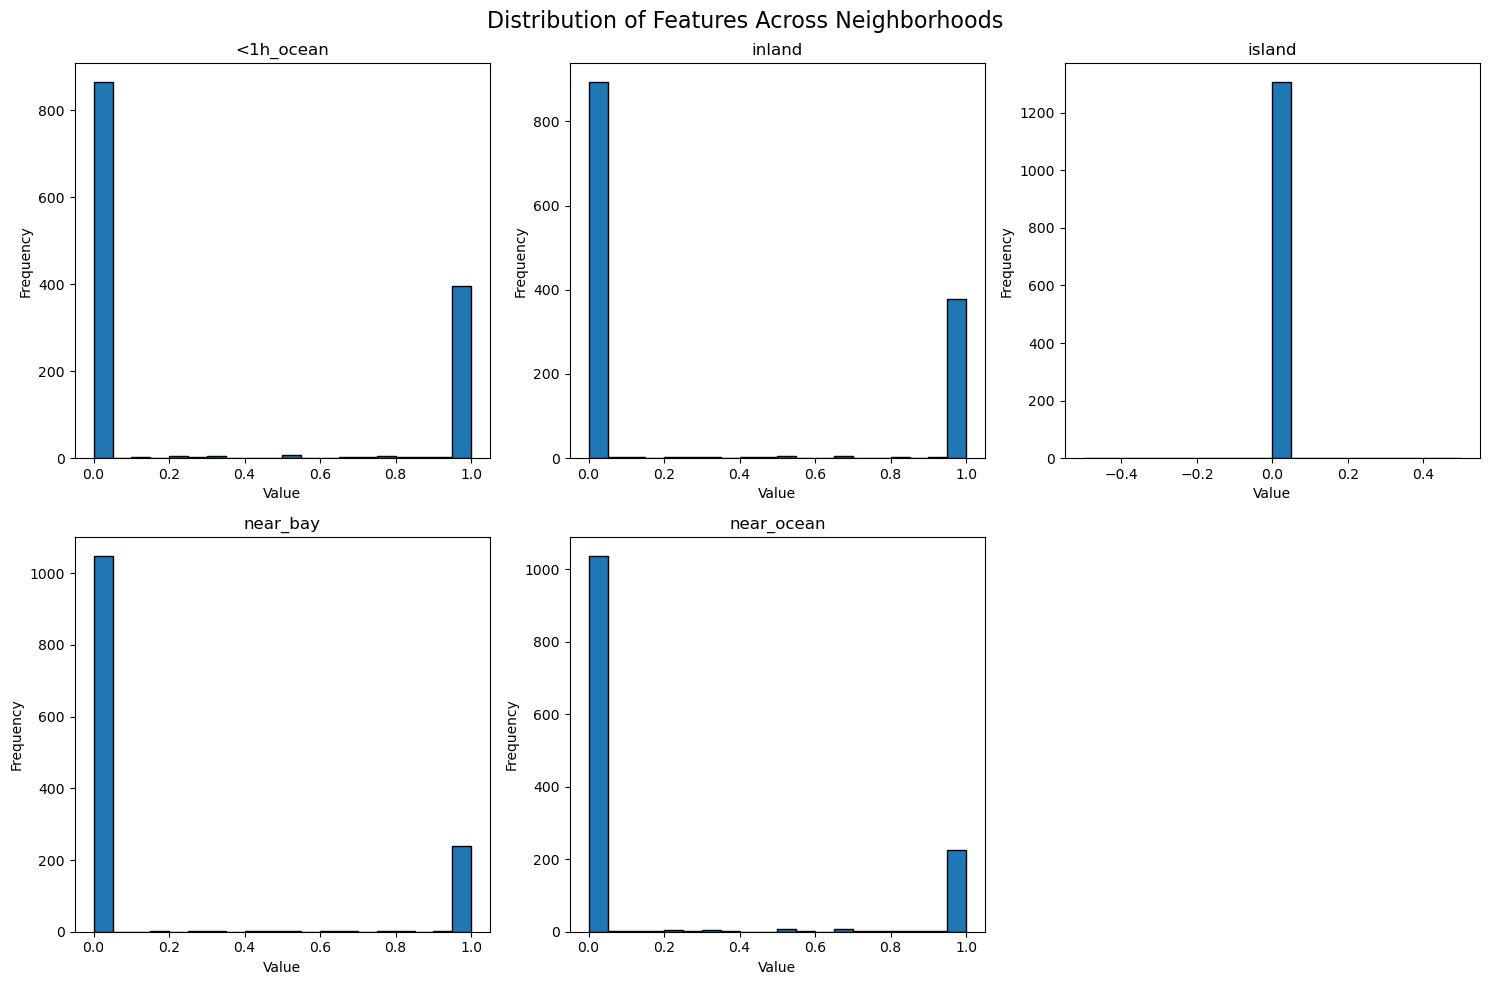

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Features Across Neighborhoods', fontsize=16)

ocean_features = ['<1h_ocean', 'inland', 'island', 'near_bay', 'near_ocean']
for idx, feature in enumerate(ocean_features):
    row = idx // 3
    col = idx % 3
    axes[row, col].hist(neighborhood_feature_store[feature], bins=20, edgecolor='black')
    axes[row, col].set_title(f'{feature}')
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')

axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

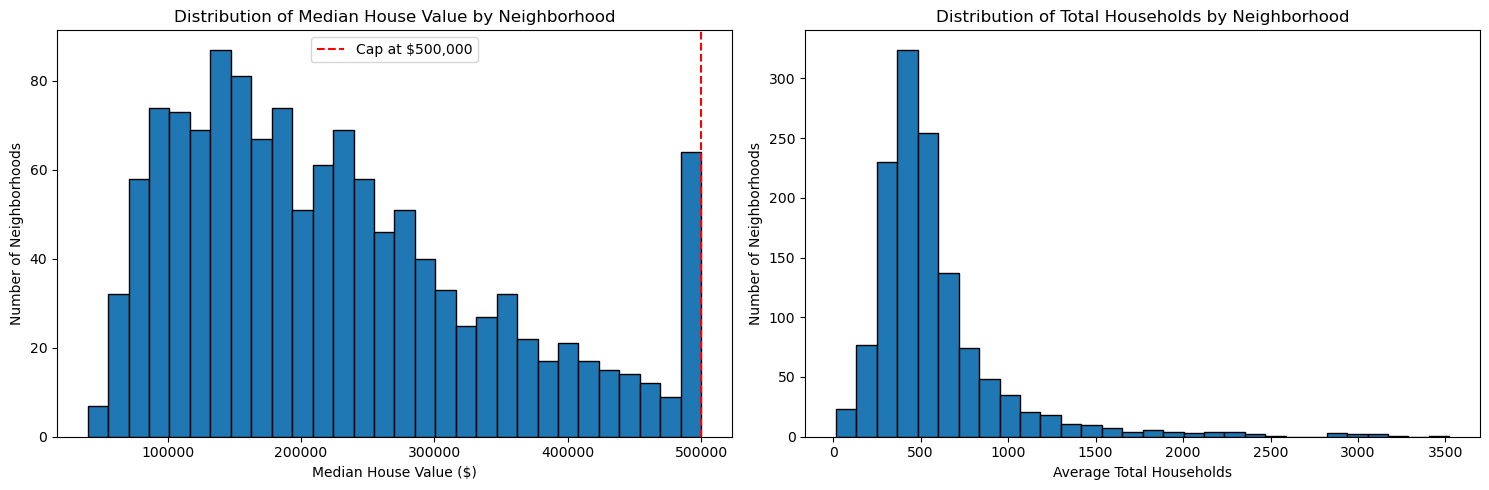

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(neighborhood_feature_store['median_house_value'], bins=30, edgecolor='black')
axes[0].set_title('Distribution of Median House Value by Neighborhood')
axes[0].set_xlabel('Median House Value ($)')
axes[0].set_ylabel('Number of Neighborhoods')
axes[0].axvline(500000, color='red', linestyle='--', label='Cap at $500,000')
axes[0].legend()

axes[1].hist(neighborhood_feature_store['total_households'], bins=30, edgecolor='black')
axes[1].set_title('Distribution of Total Households by Neighborhood')
axes[1].set_xlabel('Average Total Households')
axes[1].set_ylabel('Number of Neighborhoods')

plt.tight_layout()
plt.show()

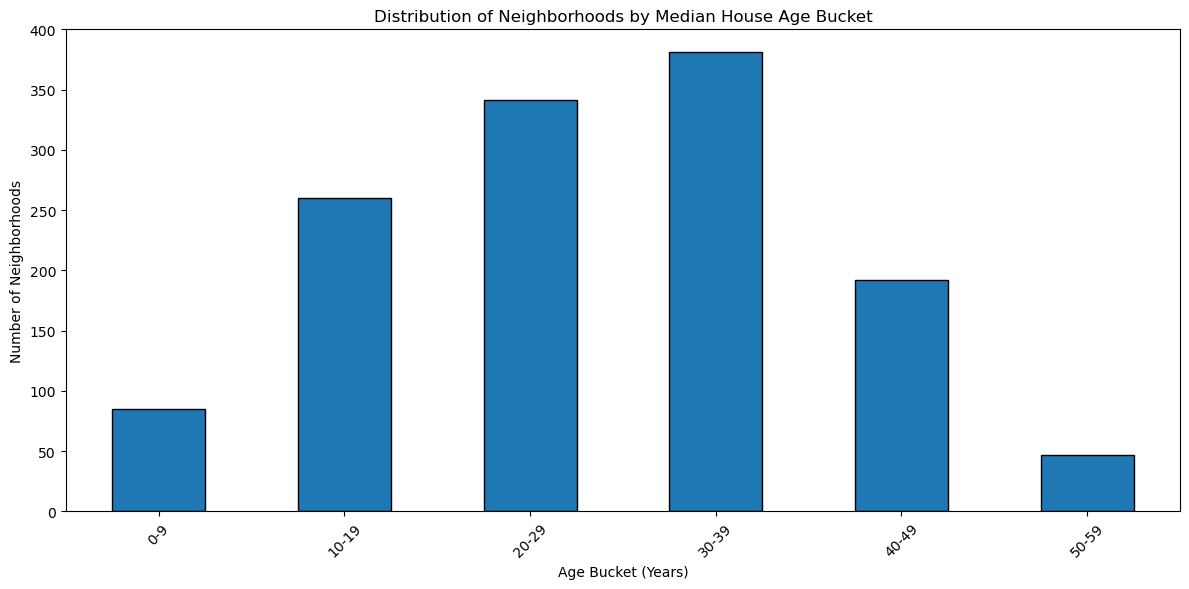

In [21]:
age_bucket_counts = neighborhood_feature_store['median_house_age_bucket'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
age_bucket_counts.plot(kind='bar', edgecolor='black')
plt.title('Distribution of Neighborhoods by Median House Age Bucket')
plt.xlabel('Age Bucket (Years)')
plt.ylabel('Number of Neighborhoods')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 10. Export Feature Store

Save the neighborhood feature store to a CSV file for future use.

In [22]:
output_filename = 'neighborhood_feature_store.csv'
neighborhood_feature_store.to_csv(output_filename, index=False)

print(f"Feature Store saved to: {output_filename}")
print(f"\nTotal Features: {len(neighborhood_feature_store.columns)}")
print(f"Total Neighborhoods: {len(neighborhood_feature_store)}")
print(f"\nFeature List:")
for i, col in enumerate(neighborhood_feature_store.columns, 1):
    print(f"{i:2d}. {col}")

Feature Store saved to: neighborhood_feature_store.csv

Total Features: 13
Total Neighborhoods: 1306

Feature List:
 1. primary_key
 2. neighborhood
 3. event_time
 4. <1h_ocean
 5. inland
 6. island
 7. near_bay
 8. near_ocean
 9. median_house_value
10. median_house_age
11. median_house_age_bucket
12. total_households
13. bedrooms_per_household


## 11. Feature Verification

Verify that all required features are present and correctly calculated.

In [23]:
required_features = [
    'primary_key',
    'neighborhood',
    'event_time',
    '<1h_ocean',
    'inland',
    'island',
    'near_bay',
    'near_ocean',
    'median_house_value',
    'median_house_age',
    'median_house_age_bucket',
    'total_households',
    'bedrooms_per_household'
]

print("Feature Verification:")
print("="*80)

all_present = True
for feature in required_features:
    if feature in neighborhood_feature_store.columns:
        print(f"{feature}")
    else:
        print(f"{feature} - MISSING!")
        all_present = False

print("\n" + "="*80)
if all_present:
    print("All required features are present in the feature store!")
else:
    print("Some required features are missing!")

print(f"\nTotal feature columns: {len(required_features)} expected, {len(neighborhood_feature_store.columns)} present")

Feature Verification:
primary_key
neighborhood
event_time
<1h_ocean
inland
island
near_bay
near_ocean
median_house_value
median_house_age
median_house_age_bucket
total_households
bedrooms_per_household

All required features are present in the feature store!

Total feature columns: 13 expected, 13 present


## 12. Sample Queries - Additional Neighborhoods

In [24]:
sample_neighborhoods = neighborhood_feature_store['neighborhood'].sample(min(5, len(neighborhood_feature_store))).tolist()

print("Querying sample neighborhoods:")

for neighborhood in sample_neighborhoods:
    query_neighborhood_features(neighborhood)

Querying sample neighborhoods:

QUERY RESULT: Skyline


,1034
primary_key,Skyline
neighborhood,Skyline
event_time,2026-01-23T17:05:16.756655
<1h_ocean,0.0
inland,0.0
island,0.0
near_bay,0.0
near_ocean,1.0
median_house_value,114500.0
median_house_age,26.5



QUERY RESULT: Riverside Bluffs


,934
primary_key,Riverside Bluffs
neighborhood,Riverside Bluffs
event_time,2026-01-23T17:05:16.756655
<1h_ocean,0.0
inland,1.0
island,0.0
near_bay,0.0
near_ocean,0.0
median_house_value,249400.0
median_house_age,13.0



QUERY RESULT: Rancho Park


,905
primary_key,Rancho Park
neighborhood,Rancho Park
event_time,2026-01-23T17:05:16.756655
<1h_ocean,1.0
inland,0.0
island,0.0
near_bay,0.0
near_ocean,0.0
median_house_value,469934.0
median_house_age,49.666667



QUERY RESULT: Grimmer


,459
primary_key,Grimmer
neighborhood,Grimmer
event_time,2026-01-23T17:05:16.756655
<1h_ocean,1.0
inland,0.0
island,0.0
near_bay,0.0
near_ocean,0.0
median_house_value,214766.666667
median_house_age,27.0



QUERY RESULT: Fremont North


,403
primary_key,Fremont North
neighborhood,Fremont North
event_time,2026-01-23T17:05:16.756655
<1h_ocean,0.0
inland,0.0
island,0.0
near_bay,0.0
near_ocean,1.0
median_house_value,222700.0
median_house_age,29.666667


# Deliverables

In [25]:
print("\n" + "="*80)
print("FINAL SUMMARY")
print("="*80)
print(f"\nFeature Store Statistics:")
print(f"  - Total Neighborhoods: {len(neighborhood_feature_store)}")
print(f"  - Total Features: {len(neighborhood_feature_store.columns)}")
print(f"  - Date Created: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

print(f"\nHousing Value Statistics:")
print(f"  - Min: ${neighborhood_feature_store['median_house_value'].min():,.2f}")
print(f"  - Max: ${neighborhood_feature_store['median_house_value'].max():,.2f}")
print(f"  - Mean: ${neighborhood_feature_store['median_house_value'].mean():,.2f}")
print(f"  - Median: ${neighborhood_feature_store['median_house_value'].median():,.2f}")

print(f"\nHousehold Statistics:")
print(f"  - Min: {neighborhood_feature_store['total_households'].min():,}")
print(f"  - Max: {neighborhood_feature_store['total_households'].max():,}")
print(f"  - Mean: {neighborhood_feature_store['total_households'].mean():,.1f}")

print(f"\nBedrooms Per Household:")
print(f"  - Min: {neighborhood_feature_store['bedrooms_per_household'].min():.2f}")
print(f"  - Max: {neighborhood_feature_store['bedrooms_per_household'].max():.2f}")
print(f"  - Mean: {neighborhood_feature_store['bedrooms_per_household'].mean():.2f}")

print("\n" + "="*80)


FINAL SUMMARY

Feature Store Statistics:
  - Total Neighborhoods: 1306
  - Total Features: 13
  - Date Created: 2026-01-23 17:05:18

Housing Value Statistics:
  - Min: $40,000.00
  - Max: $500,000.00
  - Mean: $226,045.99
  - Median: $201,525.00

Household Statistics:
  - Min: 16
  - Max: 3,522
  - Mean: 581.8

Bedrooms Per Household:
  - Min: 0.85
  - Max: 3.94
  - Mean: 1.07

